# Débiasage par Orthogonalisation

Auparavant, nous avons vu comment évaluer un modèle causal. En soi, c'est déjà un exploit considérable. Les modèles causaux estiment l'élasticité $\frac{\delta y}{\delta t}$, qui est une quantité non observée. Par conséquent, comme nous ne pouvons pas voir la vérité terrain de ce que notre modèle estime, nous devons être très créatifs dans la façon dont nous les évaluons.

La technique présentée dans le chapitre précédent reposait fortement sur des données où le traitement était assigné de manière aléatoire. L'idée était d'estimer l'élasticité $\frac{\delta y}{\delta t}$ comme le coefficient d'une régression linéaire simple de `y ~ t`. Cependant, cela ne fonctionne que si le traitement est attribué de manière aléatoire. Si ce n'est pas le cas, nous rencontrons des problèmes en raison du biais de variable omise.

Pour contourner cela, nous devons faire en sorte que les données donnent l'impression que le traitement est assigné de manière aléatoire. Je dirais qu'il existe deux principales techniques pour y parvenir. L'une consiste à utiliser le score de propension, et l'autre à utiliser l'orthogonalisation. Nous couvrirons cette dernière dans ce chapitre.

Un dernier mot de prudence avant de continuer. Je soutiendrais que probablement le moyen le plus sûr de sortir des données non aléatoires est de réaliser une sorte d'expérience pour recueillir des données aléatoires. Personnellement, je ne fais pas énormément confiance aux techniques de débiassage car on ne peut jamais savoir si l'on a pris en compte tous les facteurs de confusion. Cela dit, l'orthogonalisation vaut tout de même la peine d'être apprise. C'est une technique incroyablement puissante qui sera la base de nombreux modèles causaux à venir.

## Renaissance de la Régression Linéaire

L'idée de l'orthogonalisation repose sur un théorème conçu par trois économètres en 1933 : Ragnar Frisch, Frederick V. Waugh et Michael C. Lovell. En termes simples, il stipule que vous pouvez décomposer tout modèle de régression linéaire multivariée en trois étapes ou modèles. Supposons que vos variables explicatives soient dans une matrice $X$. Vous partitionnez maintenant cette matrice de manière à obtenir une partie, $X_1$, avec certaines des variables explicatives, et une autre partie, $X_2$, avec le reste des variables.

Dans la première étape, nous prenons le premier ensemble de variables explicatives et estimons le modèle de régression linéaire suivant

$$
y_i = \theta_0 + \pmb{\theta_1 X}_{1i} + e_i
$$

où $\pmb{\theta_1}$ est un vecteur de paramètres. Nous prenons ensuite les résidus de ce modèle

$$
y^* = y_i - (\hat{\theta}_0 + \pmb{\hat{\theta}_1 X}_{1i})
$$

Dans la deuxième étape, nous reprenons le premier ensemble de variables explicatives, mais cette fois nous estimons un modèle pour le deuxième ensemble de variables explicatives

$$
\pmb{X}_{2i} = \gamma_0 + \pmb{\gamma_1 X}_{1i} + e_i
$$

Ici, nous utilisons le premier ensemble de variables explicatives pour prédire le deuxième ensemble de variables explicatives. Enfin, nous prenons également les résidus pour cette deuxième étape.

$$
\pmb{X}^*_{2i} = \pmb{X}_{2i} - (\hat{\gamma}_0 + \pmb{\hat{\gamma}_1 X}_{1i})
$$

Enfin, nous prenons les résidus des première et deuxième étapes, et estimons le modèle suivant

$$
y_i^* = \beta_0 + \pmb{\beta_2 X}^*_{2i} + e_i
$$

Le théorème de Frisch–Waugh–Lovell stipule que l'estimation du paramètre $\pmb{\hat{\beta}_2}$ obtenue en estimant ce modèle est équivalente à celle que nous obtenons en exécutant la régression complète avec toutes les variables explicatives :

$$
y_i = \beta_0 + \pmb{\beta_1 X}_{1i} + \pmb{\beta_2 X}_{2i} + e_i
$$

![img](./data/img/orthogonal/nazare-confusa.jpg)

D'accord. Décomposons cela un peu plus. Nous savons que la régression est un modèle très spécial. Chacun de ses paramètres a l'interprétation d'une dérivée partielle : combien augmenterait $Y$ si j'augmentais une variable explicative **tout en maintenant les autres constantes**. C'est très intéressant pour l'inférence causale, car cela signifie que nous pouvons contrôler les variables dans l'analyse, même si ces mêmes variables n'ont pas été maintenues constantes lors de la collecte des données.

Nous savons également que si nous omettons des variables dans la régression, nous obtenons un biais. Plus précisément, un biais de variable omise (ou biais de confusion). Pourtant, le théorème de Frisch–Waugh–Lovell indique que je peux décomposer mon modèle de régression en deux parties, aucune d'entre elles ne contenant l'ensemble complet de variables explicatives, et obtenir toujours la même estimation que celle que j'obtiendrais en exécutant la régression entière. Non seulement cela, mais ce théorème fournit également un aperçu de ce que fait la régression linéaire. Pour obtenir le coefficient d'une variable $X_k$, la régression utilise d'abord toutes les autres variables pour prédire $X_k$ et prend les résidus. Cela "nettoie" $X_k$ de toute influence de ces variables. De cette manière, lorsque nous essayons de comprendre l'impact de $X_k$ sur $Y$, il sera exempt de biais de variable omise. Ensuite, la régression utilise toutes les autres variables pour prédire $Y$ et prend les résidus. Cela "nettoie" $Y de toute influence de ces variables, réduisant ainsi la variance de $Y$ pour qu'il soit plus facile de voir comment $X_k$ impacte $Y$.

Je sais qu'il peut être difficile d'apprécier à quel point cela est impressionnant. Mais rappelez-vous ce que fait la régression linéaire. Elle estime l'impact de $X_2$ sur $y$ tout en tenant compte de $X_1$. C'est extrêmement puissant pour l'inférence causale. Cela signifie que je peux construire un modèle qui prédit mon traitement $t$ en utilisant mes variables explicatives $X$, un modèle qui prédit le résultat $y$ en utilisant les mêmes variables, prendre les résidus des deux modèles et exécuter un modèle qui estime comment le résidu de $t$ affecte le résidu de $y$. Ce dernier modèle me dira comment $t$ affecte $y$ tout en contrôlant $X$. En d'autres termes, les deux premiers modèles contrôlent les variables de confusion. Ils génèrent des données qui sont aussi bonnes que des données aléatoires. Cela débiaise mes données. C'est ce que nous utilisons dans le modèle final pour estimer l'élasticité.

Il existe une preuve mathématique (pas si compliquée) expliquant pourquoi c'est le cas, mais je pense que l'intuition derrière ce théorème est tellement directe que nous pouvons passer directement à celle-ci.

## L'intuition derrière l'orthogonalisation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
import statsmodels.api as sm

from nb21 import cumulative_elast_curve_ci, elast, cumulative_gain_ci

Prenons à nouveau nos données de prix. Mais cette fois, nous ne prendrons que l'échantillon où les prix n'ont **pas** été assignés de manière aléatoire. Encore une fois, nous les séparons en un ensemble d'entraînement et un ensemble de test. Puisque nous utiliserons l'ensemble de test pour évaluer notre modèle causal, voyons comment nous pouvons utiliser l'orthogonalisation pour le débiaiser.

In [2]:
prices = pd.read_csv("./data/ice_cream_sales.csv")

train, test = train_test_split(prices, test_size=0.5)
train.shape, test.shape

((5000, 5), (5000, 5))

Si nous montrons les corrélations dans l'ensemble de test, nous pouvons voir que le prix est positivement corrélé avec les ventes, ce qui signifie que les ventes devraient augmenter à mesure que les prix augmentent. Cela est évidemment absurde. Les gens n'achètent pas plus de glaces si elles sont chères. Nous avons probablement un certain type de biais ici.

In [3]:
test.corr()

,temp,weekday,cost,price,sales
temp,1.000000,0.003630,0.006605,-0.011977,0.379108
weekday,0.003630,1.000000,0.011889,0.002610,0.004589
cost,0.006605,0.011889,1.000000,0.388046,-0.009410
price,-0.011977,0.002610,0.388046,1.000000,0.080040
sales,0.379108,0.004589,-0.009410,0.080040,1.000000


Si nous traçons nos données, nous pouvons voir pourquoi cela se produit. Les week-ends (samedi et dimanche) ont des prix plus élevés, mais aussi des ventes plus élevées. Nous pouvons voir que c'est le cas car le nuage de points des week-ends semble se trouver dans la partie supérieure droite du graphique.

Le week-end joue probablement un rôle important dans ce biais. Le week-end, il y a plus de ventes de glaces parce qu'il y a plus de demande. En réponse à cette demande, les prix augmentent. Ce n'est donc pas l'augmentation des prix qui entraîne une augmentation des ventes. C'est simplement que les ventes et les prix sont élevés pendant les week-ends.

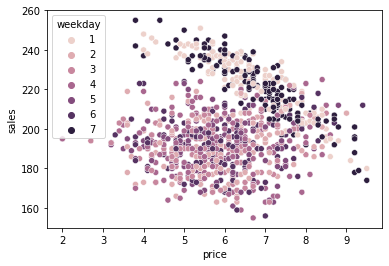

In [4]:
np.random.seed(123)
sns.scatterplot(data=test.sample(1000), x="price", y="sales", hue="weekday");

Pour débiaiser cet ensemble de données, nous aurons besoin de deux modèles. Le premier modèle, appelons-le $M_t(X)$, prédit le traitement (le prix, dans notre cas) en utilisant les variables de confusion. C'est l'une des étapes que nous avons vues plus haut, dans le théorème de Frisch–Waugh–Lovell.

In [5]:
m_t = smf.ols("price ~ cost + C(weekday) + temp", data=test).fit()
debiased_test = test.assign(**{"price-Mt(X)":test["price"] - m_t.predict(test)})

Une fois que nous avons ce modèle, nous allons construire les résidus

$$
\hat{t}_i = t_i - M_t(X_i)
$$

Vous pouvez penser à ce résidu comme une version du traitement qui est sans biais ou, mieux encore, qui est impossible à prédire à partir des variables de confusion $X$. Puisque les variables de confusion ont déjà été utilisées pour prédire $t$, le résidu est, par définition, imprévisible avec $X$. Une autre façon de dire cela est que le biais a été expliqué par le modèle $M_t(X_i)$, produisant $\hat{t}_i$, qui est aussi bon qu'assigné de manière aléatoire. Bien sûr, cela ne fonctionne que si nous avons dans $X$ toutes les variables de confusion qui causent à la fois $T$ et $Y$.

Nous pouvons également tracer ces données pour voir à quoi elles ressemblent.

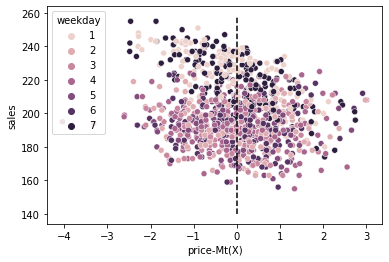

In [6]:
np.random.seed(123)
sns.scatterplot(data=debiased_test.sample(1000), x="price-Mt(X)", y="sales", hue="weekday")
plt.vlines(0, debiased_test["sales"].min(), debiased_test["sales"].max(), linestyles='--', color="black");

Nous pouvons voir que les week-ends ne se trouvent plus dans le coin supérieur droit. Ils ont été déplacés vers le centre. De plus, nous ne pouvons plus différencier les différents niveaux de prix (le traitement) en utilisant les jours de la semaine. Nous pouvons dire que le résidu $price-M_t(X)$, tracé sur l'axe des x, est une version "aléatoire" ou débiaisée du traitement initial.

Cela seul suffit à débiaiser l'ensemble de données. Ce nouveau traitement que nous avons créé est aussi bon que s'il avait été assigné de manière aléatoire. Mais nous pouvons encore faire une autre chose pour améliorer l'ensemble de données débiaisé. À savoir, nous pouvons également construire des résidus pour le résultat.

$$
\hat{y}_i = y_i - M_y(X_i)
$$

C'est une autre étape du théorème de Frisch–Waugh–Lovell. Cela ne rend pas l'ensemble moins biaisé, mais cela facilite l'estimation de l'élasticité en réduisant la variance dans $y$. Encore une fois, vous pouvez considérer $\hat{y}_i$ comme une version de $y_i$ qui est imprévisible à partir de $X$ ou qui a vu toutes ses variances dues à $X$ expliquées. Réfléchissez-y. Nous avons déjà utilisé $X$ pour prédire $y$ avec $M_y(X_i)$. Et $\hat{y}_i$ est l'erreur de cette prédiction. Donc, par définition, il est impossible de le prédire à partir de $X$. Toutes les informations contenues dans $X$ pour prédire $y$ ont déjà été utilisées. Si c'est le cas, la seule chose qui reste pour expliquer $\hat{y}_i$ est quelque chose que nous n'avons pas utilisé pour le construire (non inclus dans $X$), qui est uniquement le traitement (encore une fois, en supposant l'absence de variables de confusion non mesurées).

In [7]:
m_y = smf.ols("sales ~ cost + C(weekday) + temp", data=test).fit()

debiased_test = test.assign(**{"price-Mt(X)":test["price"] - m_t.predict(test),
                               "sales-My(X)":test["sales"] - m_y.predict(test)})

Une fois que nous avons effectué les deux transformations, non seulement les jours de la semaine ne prédisent pas les résidus des prix, mais ils ne peuvent pas non plus prédire le résidu des ventes $\hat{y}$. La seule chose qui reste pour prédire ces résidus est le traitement. De plus, remarquez quelque chose d'intéressant. Dans le graphique précédent, il était difficile de connaître la direction de l'élasticité des prix. Il semblait que les ventes diminuaient à mesure que les prix augmentaient, mais il y avait une telle variance dans les ventes qu'il était difficile de le dire avec certitude.

Maintenant, lorsque nous traçons les deux résidus, il devient beaucoup plus clair que les ventes entraînent effectivement une baisse des prix.

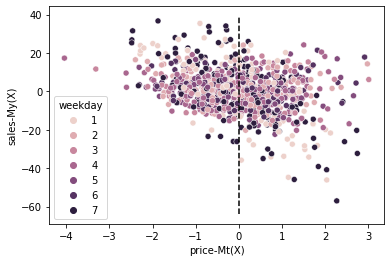

In [8]:
np.random.seed(123)
sns.scatterplot(data=debiased_test.sample(1000), x="price-Mt(X)", y="sales-My(X)", hue="weekday")
plt.vlines(0, debiased_test["sales-My(X)"].min(), debiased_test["sales-My(X)"].max(), linestyles='--', color="black");

Un petit inconvénient de ces données débiaisées est que les résidus ont été déplacés à une échelle différente. En conséquence, il est difficile d'interpréter ce qu'ils signifient (qu'est-ce qu'un résidu de prix de -3 ?). Cependant, je pense que c'est un petit prix à payer pour la commodité de construire des données aléatoires à partir de données qui n'étaient pas initialement aléatoires.

En résumé, en prédisant le traitement, nous avons construit $\hat{t}$ qui fonctionne comme une version non biaisée du traitement ; en prédisant le résultat, nous avons construit $\hat{y}$ qui est une version du résultat qui ne peut être expliquée davantage que si nous utilisons le traitement. Ces données, où nous remplaçons $y$ par $\hat{y}$ et $t$ par $\hat{t}$, sont les données débiaisées que nous voulions. Nous pouvons les utiliser pour évaluer notre modèle causal comme nous l'avons fait précédemment avec des données aléatoires.

Pour voir cela, construisons une fois de plus un modèle causal pour l'élasticité des prix en utilisant les données d'entraînement.

In [9]:
m3 = smf.ols(f"sales ~ price*cost + price*C(weekday) + price*temp", data=train).fit()

Ensuite, nous ferons des prédictions d'élasticité sur l'ensemble de test débiaisé.

In [10]:
def predict_elast(model, price_df, h=0.01):
    return (model.predict(price_df.assign(price=price_df["price"]+h))
            - model.predict(price_df)) / h

debiased_test_pred = debiased_test.assign(**{
    "m3_pred": predict_elast(m3, debiased_test),
})

debiased_test_pred.head()

,temp,weekday,cost,price,sales,price-Mt(X),sales-My(X),m3_pred
7791,20.8,3,1.5,6.3,187,-0.201769,1.441373,-0.073317
1764,26.6,3,1.5,6.3,201,-0.179506,4.737748,-2.139611
5785,24.0,4,1.0,5.8,186,-0.215107,-5.855171,-0.549798
3542,20.9,3,1.5,5.1,180,-1.401386,-5.743172,-0.108943
9250,26.7,5,1.0,7.0,201,0.978382,4.384885,-1.427230


Maintenant, lorsqu'il s'agit de tracer l'élasticité cumulative, nous ordonnons toujours l'ensemble de données par l'élasticité prédictive, mais cette fois, nous utilisons les versions débiaisées du traitement et du résultat pour obtenir cette élasticité. Cela équivaut à estimer $\beta_1$ dans le modèle de régression suivant :

$$
\hat{y}_i = \beta_0 + \beta_1 \hat{t}_i + e_i
$$

où les résidus sont comme nous les avons décrits précédemment.

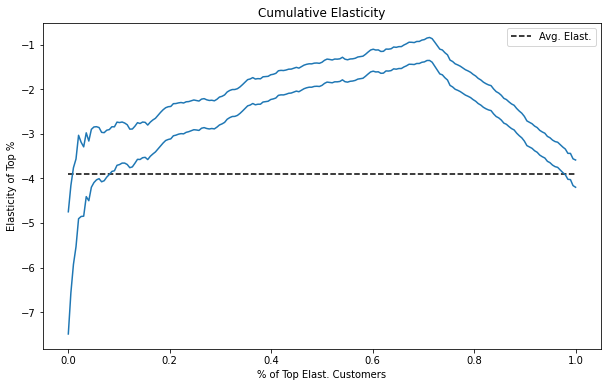

In [11]:
plt.figure(figsize=(10,6))

cumm_elast = cumulative_elast_curve_ci(debiased_test_pred, "m3_pred", "sales-My(X)", "price-Mt(X)", min_periods=50, steps=200)
x = np.array(range(len(cumm_elast)))
plt.plot(x/x.max(), cumm_elast, color="C0")

plt.hlines(elast(debiased_test_pred, "sales-My(X)", "price-Mt(X)"), 0, 1, linestyles="--", color="black", label="Avg. Elast.")
plt.xlabel("% of Top Elast. Customers")
plt.ylabel("Elasticity of Top %")
plt.title("Cumulative Elasticity")
plt.legend();

Nous pouvons faire la même chose pour la courbe de gain cumulatif, bien sûr.

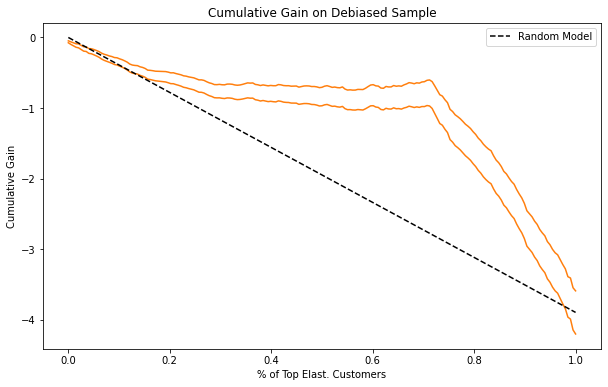

In [12]:
plt.figure(figsize=(10,6))

cumm_gain = cumulative_gain_ci(debiased_test_pred, "m3_pred", "sales-My(X)", "price-Mt(X)", min_periods=50, steps=200)
x = np.array(range(len(cumm_gain)))
plt.plot(x/x.max(), cumm_gain, color="C1")

plt.plot([0, 1], [0, elast(debiased_test_pred, "sales-My(X)", "price-Mt(X)")], linestyle="--", label="Random Model", color="black")

plt.xlabel("% of Top Elast. Customers")
plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain on Debiased Sample")
plt.legend();

Remarquez à quel point ces graphiques sont similaires à ceux du chapitre précédent. Cela indique que le débiaisage a fait des merveilles ici.

En revanche, voyons à quoi ressemblerait la courbe de gain cumulatif si nous utilisions les données d'origine, biaisées.

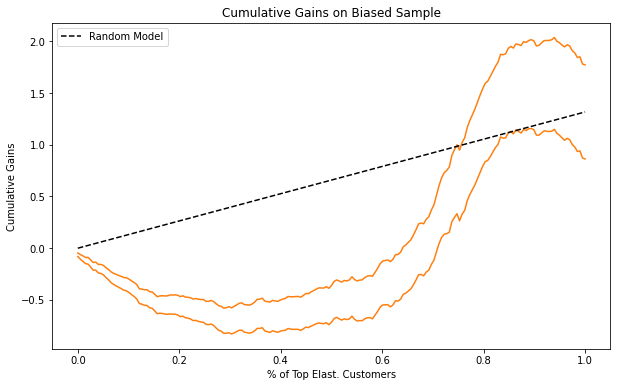

In [13]:
plt.figure(figsize=(10,6))

cumm_gain = cumulative_gain_ci(debiased_test_pred, "m3_pred", "sales", "price", min_periods=50, steps=200)
x = np.array(range(len(cumm_gain)))
plt.plot(x/x.max(), cumm_gain, color="C1")

plt.plot([0, 1], [0, elast(debiased_test_pred, "sales", "price")], linestyle="--", label="Random Model", color="black")

plt.xlabel("% of Top Elast. Customers")
plt.title("Cumulative Gains on Biased Sample")
plt.ylabel("Cumulative Gains")
plt.legend();

La première chose que vous devriez remarquer est que l'élasticité moyenne augmente au lieu de diminuer. Nous avons déjà vu cela. Dans les données biaisées, il semble que les ventes augmentent à mesure que le prix augmente. En conséquence, le point final dans la courbe de gain cumulatif est positif. Cela n'a pas beaucoup de sens, car nous savons que les gens n'achètent pas plus lorsque les prix des glaces augmentent. Si l'élasticité moyenne des prix est déjà faussée, tout ordre basé sur celle-ci n'a également pas beaucoup de sens. La conclusion est que ces données ne doivent pas être utilisées pour l'évaluation du modèle.

## Orthogonalisation avec le Machine Learning

Dans un article de 2016, Victor Chernozhukov *et al.* ont montré que vous pouvez également faire de l'orthogonalisation avec des modèles de machine learning. C'est évidemment une science très récente, et nous avons encore beaucoup à découvrir sur ce que nous pouvons et ne pouvons pas faire avec les modèles de machine learning. Néanmoins, c'est une idée très intéressante à connaître.

Les principes de base sont pratiquement les mêmes que ceux que nous avons déjà couverts. La seule différence est que maintenant, nous utilisons des modèles de machine learning pour le débiaisage.

$$
\begin{align}
\hat{y}_i &= y_i - M_y(X_i) \\
\hat{t}_i &= t_i - M_t(X_i)
\end{align}
$$

Cependant, il y a un piège. Comme nous le savons très bien, les modèles de machine learning sont si puissants qu'ils peuvent parfaitement ajuster les données, voire plutôt, les surajuster. Rien qu'en regardant les équations ci-dessus, nous pouvons deviner ce qui se passera dans ce cas. Si $M_y$ surajuste d'une manière ou d'une autre, les résidus seront tous très proches de zéro. Si cela se produit, il sera difficile de déterminer comment $t$ l'affecte. De même, si $M_t$ surajuste, ses résidus seront également proches de zéro. Par conséquent, il n'y aura pas de variation dans les résidus de traitement pour voir comment ils peuvent impacter le résultat.

Pour tenir compte de cela, nous devons faire une division d'échantillon. Autrement dit, nous estimons le modèle avec une partie de l'ensemble de données et nous faisons des prédictions dans l'autre partie. La façon la plus simple de le faire est de diviser l'échantillon de test en deux, de créer deux modèles de manière à ce que chacun soit estimé sur une moitié de l'ensemble de données et fasse des prédictions sur l'autre moitié.

Une implémentation légèrement plus élégante utilise la validation croisée en K-plis. L'avantage est que nous pouvons entraîner tous les modèles sur un échantillon plus grand que la moitié de l'ensemble de test.

![img](./data/img/orthogonal/kfold-cv.png)

Heureusement, ce type de prédiction croisée est très facile à implémenter en utilisant la fonction `cross_val_predict` de Sklearn.

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

X = ["cost", "weekday", "temp"]
t = "price"
y = "sales"

folds = 5

np.random.seed(123)
m_t = RandomForestRegressor(n_estimators=100)
t_res = test[t] - cross_val_predict(m_t, test[X], test[t], cv=folds)

m_y = RandomForestRegressor(n_estimators=100)
y_res = test[y] - cross_val_predict(m_y, test[X], test[y], cv=folds)

Maintenant que nous avons les résidus, stockons-les en tant que colonnes dans un nouvel ensemble de données.

In [15]:
ml_debiased_test = test.assign(**{
    "sales-ML_y(X)": y_res,
    "price-ML_t(X)": t_res,
})
ml_debiased_test.head()

,temp,weekday,cost,price,sales,sales-ML_y(X),price-ML_t(X)
7791,20.8,3,1.5,6.3,187,-3.150833,-0.869267
1764,26.6,3,1.5,6.3,201,-0.418857,-0.192867
5785,24.0,4,1.0,5.8,186,-2.515667,0.790429
3542,20.9,3,1.5,5.1,180,-11.718500,-1.280460
9250,26.7,5,1.0,7.0,201,-1.214167,1.715117


Enfin, nous pouvons tracer l'ensemble de données débiaisé.

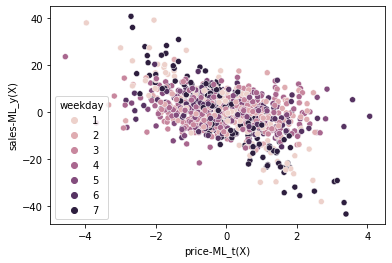

In [16]:
np.random.seed(123)
sns.scatterplot(data=ml_debiased_test.sample(1000),
                x="price-ML_t(X)", y="sales-ML_y(X)", hue="weekday");

Une fois de plus, nous avons mis en évidence une élasticité prix-négative sur les ventes. En réalité, le graphique est incroyablement similaire à celui que nous avons obtenu en utilisant une simple régression linéaire. Mais cela est probablement dû au fait qu'il s'agit d'un ensemble de données très simple. Les avantages de l'orthogonalisation par machine learning résident dans sa capacité à estimer des fonctions plus complexes. Il peut apprendre des interactions et des non-linéarités d'une manière difficile à encoder dans la régression linéaire. De plus, un avantage est que certains modèles de machine learning (ceux basés sur des arbres de décision) sont beaucoup plus simples à exécuter que la régression linéaire. Ils peuvent gérer des données catégorielles, des valeurs aberrantes et même des données manquantes, des éléments qui nécessiteraient une certaine attention si vous utilisez simplement la régression linéaire.

Enfin, avant de conclure, je dois aborder une erreur courante que les data scientists commettent souvent lorsqu'ils découvrent cette idée (je suis passé par là). Si le traitement ou le résultat est binaire, on pourrait penser qu'il est préférable de remplacer les modèles de régression par leurs versions de classification. Cependant, cela ne fonctionne pas. La théorie de l'orthogonalisation ne fonctionne qu'avec des modèles de régression, de manière similaire à ce que nous avons vu il y a longtemps en parlant des Variables Instrumentales. Pour être honnête, ce n'est pas que le modèle échouera de manière catastrophique si vous remplacez la régression par la classification, mais je déconseillerais cela. Si la théorie ne le justifie pas, pourquoi prendre le risque ?

## Idées Clés

Nous avons commencé le chapitre en soulignant la nécessité d'une attribution aléatoire du traitement pour que nos méthodes d'évaluation causale fonctionnent. Cela pose un problème dans le cas où des données aléatoires ne sont pas disponibles. Pour être clair, la solution la plus sûre dans ce cas est de réaliser des expériences afin d'obtenir des données aléatoires. Si cela est exclu, alors seulement, nous pouvons nous fier à une alternative ingénieuse : transformer nos données pour qu'elles semblent avoir été attribuées de manière aléatoire.

Ici, nous avons expliqué comment le faire en utilisant les principes de l'orthogonalisation. Tout d'abord, nous avons construit un modèle qui utilise nos caractéristiques $X$ pour prédire le traitement $t$ et obtenir ses résidus. L'idée est que les résidus du traitement sont, par définition, indépendants des caractéristiques utilisées pour les construire. En d'autres termes, les résidus de traitement sont orthogonaux aux caractéristiques. Nous pouvons voir ces résidus comme une version du traitement où tous les biais de confusion dus à $X$ ont été supprimés.

Cela seul suffit à rendre nos données aussi bonnes que des données aléatoires. Mais nous pouvons aller un peu plus loin. Nous pouvons construire un modèle qui prédit le résultat $y$ en utilisant les caractéristiques $X$, mais pas le traitement, et obtenir également ses résidus. Encore une fois, l'intuition est très similaire. Ces résidus de résultat sont une version du résultat où toute la variance due aux caractéristiques a été expliquée. Cela expliquera, espérons-le, une grande partie de la variance, ce qui facilitera la compréhension de l'effet du traitement.

Ici, nous utilisons l'orthogonalisation dans le but de débiaiser nos données pour l'évaluation des modèles. Cependant, cette technique est également utilisée à d'autres fins. En effet, de nombreux modèles d'inférence causale utilisent l'orthogonalisation comme première étape de prétraitement pour faciliter la tâche du modèle d'inférence causale. On peut dire que l'orthogonalisation constitue la base de nombreux algorithmes modernes d'inférence causale.

![img](./data/img/orthogonal/athlas.png)


## Références 

Les choses que j'ai écrites ici viennent principalement de ma propre expérience. Je les ai apprises par la pratique. Cela signifie qu'il n'y a pas de référence directe à laquelle je peux vous renvoyer. Cela signifie aussi que ce que j'ai écrit ici n'a **pas** été soumis à l'examen académique que la bonne science traverse souvent. Au lieu de cela, remarquez comment je parle de choses qui fonctionnent dans la pratique, mais je ne passe pas trop de temps à expliquer pourquoi cela est le cas. C'est une sorte de science de la rue, si vous voulez. Cependant, je mets cela à la disposition du public pour examen, donc, si vous trouvez quelque chose d'absurde, ouvrez un problème et je le traiterai au mieux de mes efforts.

Ce chapitre est basé sur l'article de Victor Chernozhukov *et al.* (2016), Double/Debiased Machine Learning for Treatment and Causal Parameters. Vous pouvez également consulter l'article original de Frisch, Ragnar ; Waugh, Frederick V. (1933), Partial Time Regressions as Compared with Individual Trends.

## Contribuer

*L'Inférence Causale pour les Courageux et les Vrais* est un matériel open-source sur l'inférence causale, la statistique de la science. Son objectif est d'être accessible monétairement et intellectuellement. Il utilise uniquement des logiciels gratuits basés sur Python.
Si vous avez trouvé ce livre précieux et souhaitez le soutenir, veuillez vous rendre sur [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Si vous n'êtes pas prêt à contribuer financièrement, vous pouvez également aider en corrigeant les fautes de frappe, en suggérant des modifications ou en donnant votre avis sur les passages que vous n'avez pas compris. Rendez-vous sur le repo du livre et [ouvrez une issue](https://github.com/matheusfacure/python-causality-handbook/issues). Enfin, si vous avez aimé ce contenu, veuillez le partager avec d'autres personnes qui pourraient le trouver utile et lui donner une [étoile sur GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).